<a href="https://colab.research.google.com/github/NithinGudimetla/PDS/blob/main/PDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [6]:

# Load the dataset
df = pd.read_csv('lending_data.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  
loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


In [11]:

# Assuming 'CreditRisk' is the target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[14944    67]
 [   48   449]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15011
           1       0.87      0.90      0.89       497

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



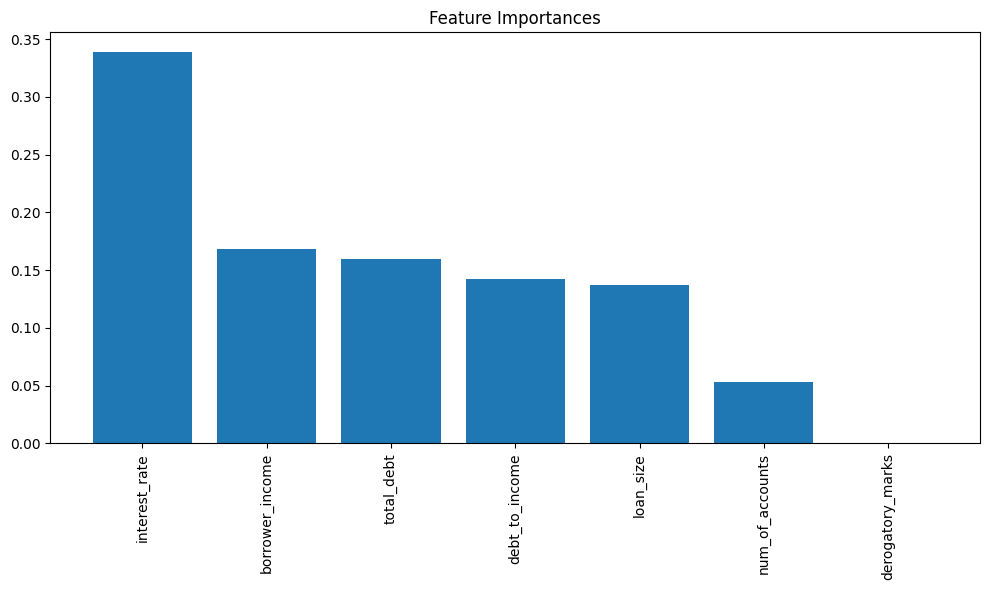

In [16]:


# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [17]:
# Probability prediction
prob = model.predict_proba(X_test_scaled)
print(prob[:5])  # Probabilities for first 5 test samples


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
